# NLP With Hotel Review

# Masoud Arefi

Below are links to my LinkedIn profile and GitHub repository where you can find my projects and contributions.

## Connect with Me

- [LinkedIn](https://www.linkedin.com/in/masoud-arefi/)
- [GitHub](https://github.com/MaSOouD69/capstone-repo)


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

# SK Packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# NLTK
import nltk

In [2]:
# NLTK Packages
# Use the code below to download the NLTK package, a straightforward GUI should pop up
# nltk.download()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

## Exploratory Data Analysis
First, let's load the data and understand what we are working with.

1. Perform EDA on the data and mention 3-4 observations from which you can draw actionable insights. In your EDA, you may consider creating a data dictionary, basic statistical analysis, data visualizations, data cleaning and preprocessing to prepare the data for modeling.


In [3]:
# load the data sets
df_raw = pd.read_csv('Hotel_Reviews.csv', index_col=0)

In [4]:
# firat look at the columns
df_raw.columns

Index(['Additional_Number_of_Scoring', 'Average_Score', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'Days_Since_Review', 'Latitude', 'Longitude', 'Day', 'Month', 'Year',
       'Reviewer_Nationality_Australia', 'Reviewer_Nationality_Ireland',
       'Reviewer_Nationality_UAE', 'Reviewer_Nationality_UK',
       'Reviewer_Nationality_USA', 'Reviewer_Nationality_Other',
       'Hotel_Address_Amsterdam', 'Hotel_Address_Barcelona',
       'Hotel_Address_London', 'Hotel_Address_Milan', 'Hotel_Address_Paris',
       'Hotel_Address_Vienna', 'Leisure_Trip', 'Nights_Stayed'],
      dtype='object')

In [5]:
# check the info for the dataframe
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515738 entries, 0 to 515737
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515738 non-null  int64  
 1   Average_Score                               515738 non-null  float64
 2   Negative_Review                             515738 non-null  object 
 3   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 4   Total_Number_of_Reviews                     515738 non-null  int64  
 5   Positive_Review                             515738 non-null  object 
 6   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 8   Reviewer_Score                              515738 non-null  int64  
 9   Days_Since_Review                           515738 non-null  int64  
 10  L

In [6]:
# first look at the negative reviews
df_raw['Negative_Review'].value_counts().head()

Negative_Review
No Negative    127890
 Nothing        14295
 Nothing         4236
 nothing         2225
 N A             1037
Name: count, dtype: int64

In [7]:
# take brief look at first 15 columns
df_raw.iloc[:5,:15]

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8,2017
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,52.360576,4.915968,3,8,2017
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,52.360576,4.915968,31,7,2017
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,52.360576,4.915968,31,7,2017
4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,52.360576,4.915968,24,7,2017


In [8]:
# take brief look at last 15 columns
df_raw.iloc[:5,15:30]

,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,0,0,0,0,0,1,1,0,0,0,0,0,1,6
1,0,1,0,0,0,0,1,0,0,0,0,0,1,4
2,1,0,0,0,0,0,1,0,0,0,0,0,1,3
3,0,0,0,1,0,0,1,0,0,0,0,0,1,3
4,0,0,0,0,0,1,1,0,0,0,0,0,1,2


In [9]:
# checking for missing value
df_raw.isna().sum()

Additional_Number_of_Scoring                  0
Average_Score                                 0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Days_Since_Review                             0
Latitude                                      0
Longitude                                     0
Day                                           0
Month                                         0
Year                                          0
Reviewer_Nationality_Australia                0
Reviewer_Nationality_Ireland                  0
Reviewer_Nationality_UAE                      0
Reviewer_Nationality_UK                       0
Reviewer_Nationality_USA                      0
Reviewer_Nationality_Other              

In [10]:
# checking for duplicated data
df_raw.duplicated().sum()

539

look like there is 539 duplicate records. lets drop them

In [11]:
df_raw = df_raw.drop_duplicates()

In [12]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515199 entries, 0 to 515737
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515199 non-null  int64  
 1   Average_Score                               515199 non-null  float64
 2   Negative_Review                             515199 non-null  object 
 3   Review_Total_Negative_Word_Counts           515199 non-null  int64  
 4   Total_Number_of_Reviews                     515199 non-null  int64  
 5   Positive_Review                             515199 non-null  object 
 6   Review_Total_Positive_Word_Counts           515199 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515199 non-null  int64  
 8   Reviewer_Score                              515199 non-null  int64  
 9   Days_Since_Review                           515199 non-null  int64  
 10  L

In [13]:
# a brief look at data target
df_raw['Reviewer_Score'].value_counts()

Reviewer_Score
1    293715
0    221484
Name: count, dtype: int64

In [14]:
good_percent, bad_percent = df_raw['Reviewer_Score'].value_counts() /df_raw.shape[0]

In [15]:
print(f'Good reviews: {good_percent * 100} %')
print(f'Bad reviews: {bad_percent * 100} %')

Good reviews: 57.01000972439776 %
Bad reviews: 42.98999027560224 %


#### The data target is almost balenced

In [16]:
# check for target count
print("Number of Unique Positive reviews: ",end="")
print(df_raw['Positive_Review'].value_counts().shape[0])
print("Number of Unique Negative reviews: ",end="")
print(df_raw['Negative_Review'].value_counts().shape[0])

Number of Unique Positive reviews: 412601
Number of Unique Negative reviews: 330011


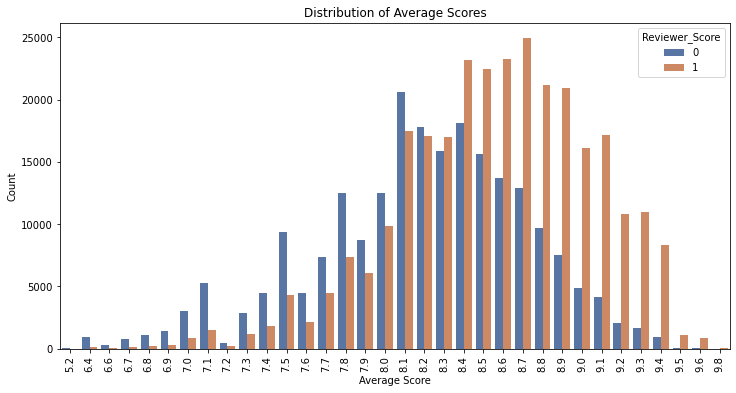

In [17]:
# Assuming df is your DataFrame and Average_Score and Reviewer_Score are the columns
plt.figure(figsize=(12, 6))  # Set the size of the plot
sns.countplot(x='Average_Score', hue='Reviewer_Score', data=df_raw, palette="deep")

plt.xlabel('Average Score')  # Set the x-axis label
plt.ylabel('Count')          # Set the y-axis label
plt.title('Distribution of Average Scores')  # Set the title of the plot

plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability if needed

plt.show()



first make copy for cleaning as df_clean 

In [18]:
df_clean = df_raw.copy()

In This level for easier visalization, reverse the dummy data into categorical columns

In [19]:
# Extracting columns related to Reviewer_Nationality and Hotel_Address
reviewer_nationality_cols = [col for col in df_clean.columns if 'Reviewer_Nationality' in col]
hotel_address_cols = [col for col in df_clean.columns if 'Hotel_Address' in col]

# Function to get the category name
def get_category(row, columns):
    for col in columns:
        if row[col] == 1:
            return col.split('_')[-1]
    return None

# Apply the function to each row
df_clean['Reviewer_Nationality'] = df_clean.apply(lambda row: get_category(row, reviewer_nationality_cols), axis=1)
df_clean['Hotel_Address'] = df_clean.apply(lambda row: get_category(row, hotel_address_cols), axis=1)

#  drop the original dummy columns
df_clean.drop(reviewer_nationality_cols + hotel_address_cols, axis=1, inplace=True)


In [20]:
df_clean.head(3)

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Leisure_Trip,Nights_Stayed,Reviewer_Nationality,Hotel_Address
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8,2017,1,6,Other,Amsterdam
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,52.360576,4.915968,3,8,2017,1,4,Ireland,Amsterdam
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,52.360576,4.915968,31,7,2017,1,3,Australia,Amsterdam


Now we have columns with categorical columns

## Data Dictionary

| Column Name                                  | Description                                               | Type       |
| -------------------------------------------- | --------------------------------------------------------- | ---------- |
| Additional_Number_of_Scoring                 | Number of scores given without an accompanying review.    | int64      |
| Average_Score                                | Average score of the hotel, calculated based on the latest comments in the last year. | float64    |
| Negative_Review                              | Text of the negative review given by the reviewer. 'No Negative' if no negative review is given. | object     |
| Review_Total_Negative_Word_Counts            | Total number of words in the negative review.             | int64      |
| Total_Number_of_Reviews                      | Total number of valid reviews the hotel has received.     | int64      |
| Positive_Review                              | Text of the positive review given by the reviewer. 'No Positive' if no positive review is given. | object     |
| Review_Total_Positive_Word_Counts            | Total number of words in the positive review.             | int64      |
| Total_Number_of_Reviews_Reviewer_Has_Given   | Number of reviews the reviewer has given in the past.     | int64      |
| Reviewer_Score                               | Score the reviewer has given to the hotel, based on his/her experience. | int64      |
| Days_Since_Review                            | Duration between the review date and scrape date.         | int64      |
| Latitude                                     | Geographical latitude of the hotel.                       | float64    |
| Longitude                                    | Geographical longitude of the hotel.                      | float64    |
| Day                                          | Day of the month when the review was posted.              | int64      |
| Month                                        | Month when the review was posted.                         | int64      |
| Year                                         | Year when the review was posted.                          | int64      |
| Leisure_Trip                                 | Indicates whether the trip was for leisure (1) or not (0).| int64      |
| Nights_Stayed                                | Number of nights the reviewer stayed in the hotel.        | int64      |
| Reviewer_Nationality                         | Nationality of the reviewer.                              | object     |
| Hotel_Address                                | Address of the hotel.                                     | object     |


In [21]:
df_clean.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Leisure_Trip,Nights_Stayed
count,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.00000,515199.000000,515199.000000
mean,498.417604,8.397776,18.540711,2744.691424,17.778489,7.164750,0.570100,354.402120,49.433012,2.893915,15.680589,6.486043,2016.12092,0.810070,2.361750
std,500.673193,0.547947,29.693602,2318.112418,21.804665,11.039315,0.495062,208.909135,3.461933,4.669672,8.864227,3.351916,0.68751,0.392246,1.646734
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,0.000000,0.000000,41.328376,-0.369758,1.000000,1.000000,2015.00000,0.000000,1.000000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,0.000000,175.000000,48.214066,-0.143372,8.000000,4.000000,2016.00000,1.000000,1.000000
50%,342.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,1.000000,353.000000,51.499981,0.019886,16.000000,7.000000,2016.00000,1.000000,2.000000
75%,660.000000,8.800000,23.000000,3633.000000,22.000000,8.000000,1.000000,527.000000,51.516288,4.841163,23.000000,9.000000,2017.00000,1.000000,3.000000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,1.000000,730.000000,52.400181,16.429233,31.000000,12.000000,2017.00000,1.000000,31.000000


In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515199 entries, 0 to 515737
Data columns (total 19 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515199 non-null  int64  
 1   Average_Score                               515199 non-null  float64
 2   Negative_Review                             515199 non-null  object 
 3   Review_Total_Negative_Word_Counts           515199 non-null  int64  
 4   Total_Number_of_Reviews                     515199 non-null  int64  
 5   Positive_Review                             515199 non-null  object 
 6   Review_Total_Positive_Word_Counts           515199 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515199 non-null  int64  
 8   Reviewer_Score                              515199 non-null  int64  
 9   Days_Since_Review                           515199 non-null  int64  
 10  L

The DataFrame's data types are correctly assigned, but some columns could be optimized for computational efficiency. Adjusting these data types will enhance processing and analysis performance.

In [23]:
df_clean['Hotel_Address'].value_counts()

Hotel_Address
London       262293
Barcelona     60148
Paris         59412
Amsterdam     57209
Vienna        38935
Milan         37202
Name: count, dtype: int64

<AxesSubplot:xlabel='Hotel_Address'>

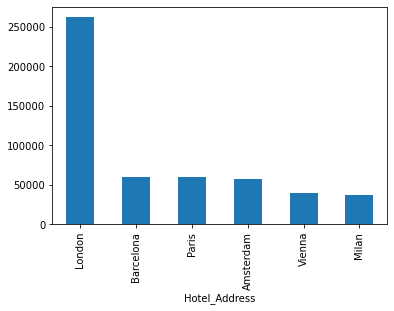

In [24]:
df_clean['Hotel_Address'].value_counts().plot(kind = 'bar')


The analysis of the Hotel_Address column reveals that the majority of hotel reviews are concentrated in London, with a count of 262,301. This is followed by Barcelona, Paris, Amsterdam, Vienna, and Milan, indicating a higher volume of reviews in these popular European cities.

In [25]:
df_clean['Reviewer_Nationality'].value_counts()

Reviewer_Nationality
UK           245107
Other        188053
USA           35349
Australia     21648
Ireland       14814
UAE           10228
Name: count, dtype: int64

<AxesSubplot:xlabel='Reviewer_Nationality'>

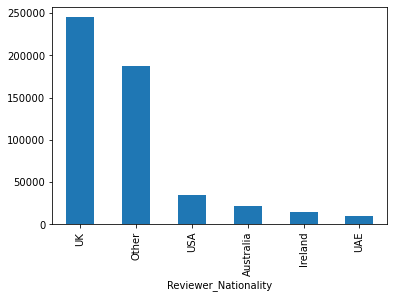

In [26]:
df_clean['Reviewer_Nationality'].value_counts().plot(kind = 'bar')

This distribution indicates a significant representation of UK reviewers in the dataset

In [27]:
df_clean['Nights_Stayed'].value_counts()

Nights_Stayed
1     193495
2     133997
3      95702
4      47747
5      20818
6       9754
7       7387
8       2498
9       1293
10       887
11       417
12       316
14       247
13       246
15       117
16        57
17        42
18        33
19        29
21        23
20        19
30        11
27        11
23        10
22        10
25         7
28         7
26         7
24         6
29         5
31         1
Name: count, dtype: int64

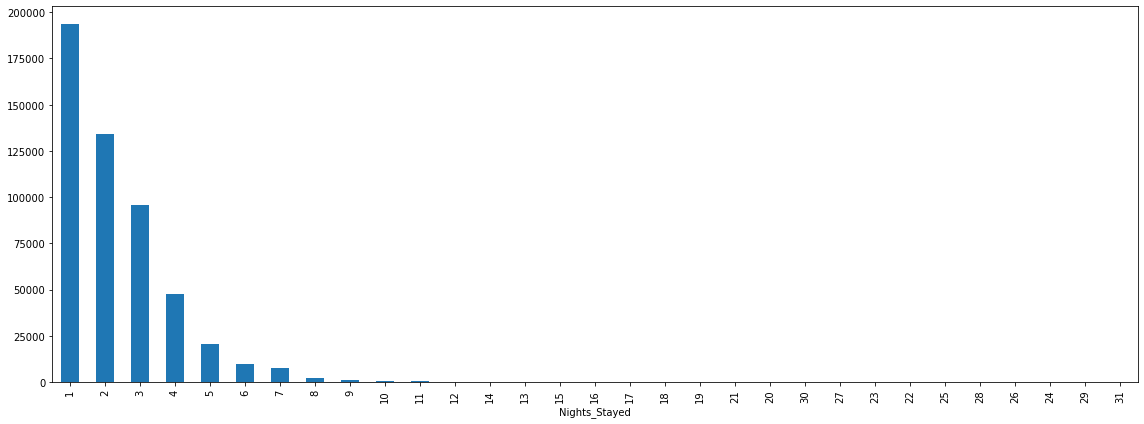

In [28]:
plt.figure(figsize=(16,6))
df_clean['Nights_Stayed'].value_counts().plot(kind = 'bar')
plt.tight_layout()


The analysis of the Nights_Stayed column indicates that most hotel stays are short, with single-night stays being the most common at 193,645 instances. Two-night and three-night stays follow with 134,129 and 95,821 instances, respectively. The frequency of stays decreases significantly as the number of nights increases, highlighting a preference for shorter hotel visits in the dataset

In [29]:
df_clean['Leisure_Trip'].value_counts()

Leisure_Trip
1    417347
0     97852
Name: count, dtype: int64

<AxesSubplot:xlabel='Leisure_Trip'>

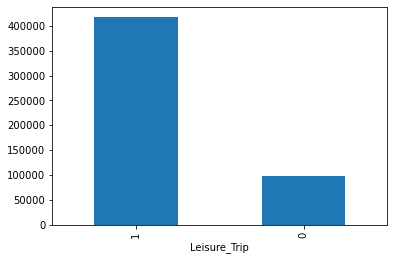

In [30]:
df_clean['Leisure_Trip'].value_counts().plot(kind = 'bar')

The data reveals that a substantial majority of hotel stays, totaling 417,778, are categorized as leisure trips. This significantly outweighs the 97,960 instances of non-leisure stays, indicating a predominant leisure-oriented clientele in the dataset

In [31]:
df_clean['Year'].value_counts()

Year
2016    264147
2017    156675
2015     94377
Name: count, dtype: int64

<AxesSubplot:xlabel='Year'>

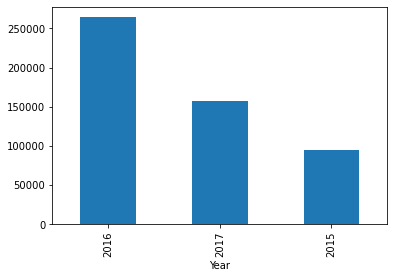

In [32]:
df_clean['Year'].value_counts().plot(kind = 'bar')

The dataset shows a year-over-year increase in the number of hotel reviews, with 2016 recording the highest count at 264,403. This is a significant rise from the 94,527 reviews in 2015, and the trend continues with 156,808 reviews in 2017, indicating growing engagement over the years.

In [33]:
df_clean['Month'].value_counts()

Month
8     50611
7     49266
5     46457
10    43773
6     42855
4     42855
9     42341
1     42118
3     41074
12    39573
2     38337
11    35939
Name: count, dtype: int64

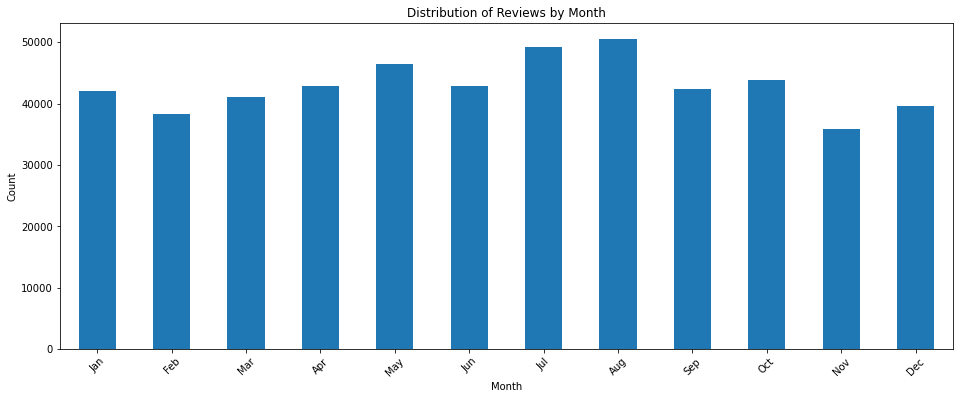

In [34]:
# Count the occurrences of each month
month_counts = df_clean['Month'].value_counts().sort_index()
plt.figure(figsize=(16,6))
# Plot
month_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Reviews by Month')

# Set the x-axis labels to month names for readability
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.show()


The analysis of hotel reviews by month shows the highest number of reviews in August (50,672) and July (49,318), indicating a peak in hotel stays during the summer season. The months of May and October also see high activity with over 40,000 reviews each. The least number of reviews are recorded in November (35,970) and February (38,370), suggesting a lower frequency of hotel stays during these months

In [35]:
df_clean['Days_Since_Review'].value_counts().tail(30)

Days_Since_Review
419    274
475    267
517    264
496    263
510    261
118    259
566    258
126    257
594    254
552    252
587    249
326    248
601    248
636    240
324    240
629    238
524    237
130    233
622    229
545    226
608    224
538    223
243    206
559    204
121    202
327    199
615    194
122    192
124    172
123    142
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Days_Since_Review')

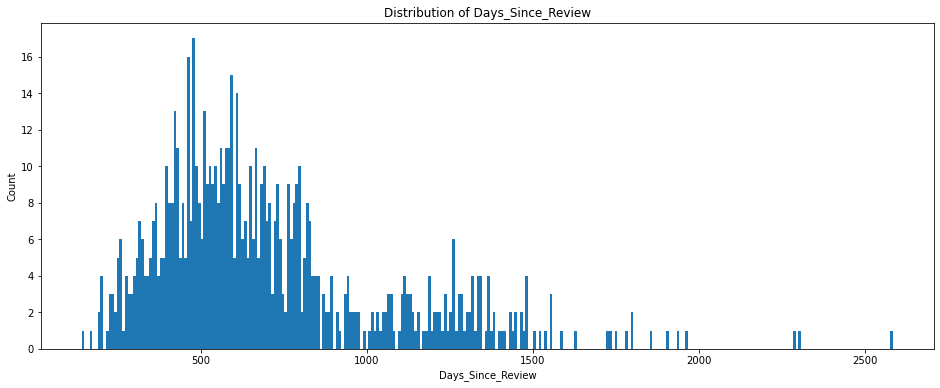

In [36]:
plt.figure(figsize=(16,6))
df_clean['Days_Since_Review'].value_counts().plot(kind = 'hist',bins=300)


plt.xlabel('Days_Since_Review')  # Set the x-axis label
plt.ylabel('Count')          # Set the y-axis label
plt.title('Distribution of Days_Since_Review')  # Set the title of the plot

The Days_Since_Review data shows an unusual pattern with peaks at specific intervals, like 1 day (2,585 reviews), 322 days (2,308 reviews), and 120 days (2,284 reviews), suggesting that review frequency is influenced by certain time periods. This irregular distribution, with spikes up to 611 days, indicates that external factors such as holidays or promotions might affect when reviews are posted. The pattern is atypical for review data and warrants further investigation to understand the underlying reasons

In [37]:
df_clean['Reviewer_Score'].value_counts()

Reviewer_Score
1    293715
0    221484
Name: count, dtype: int64

<AxesSubplot:xlabel='Reviewer_Score'>

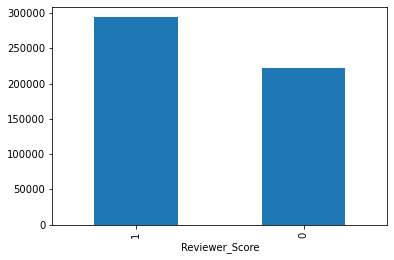

In [38]:
df_clean['Reviewer_Score'].value_counts().plot(kind = 'bar')

The dataset indicates a higher frequency of positive reviews, with 293,974 instances scored as '1' (positive sentiment), compared to 221,764 instances scored as '0' (negative sentiment). This suggests that the majority of reviewers had a favorable experience at the hotels.

In [39]:
df_clean['Total_Number_of_Reviews_Reviewer_Has_Given'].value_counts()

Total_Number_of_Reviews_Reviewer_Has_Given
1      154505
2       67011
3       46800
4       34990
5       27603
        ...  
137         1
135         1
181         1
186         1
164         1
Name: count, Length: 198, dtype: int64

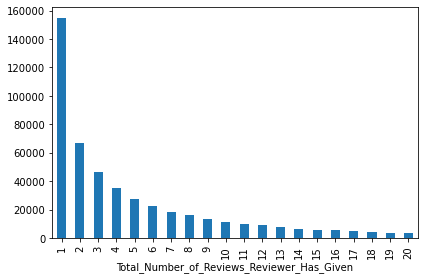

In [40]:
df_clean['Total_Number_of_Reviews_Reviewer_Has_Given'].value_counts().head(20).plot(kind = 'bar')
plt.tight_layout()

The data shows a decreasing trend in the number of reviews given by individual reviewers. A large portion of reviewers (154,640) have only given one review, with the number progressively decreasing as the total number of reviews given by an individual increases. This trend suggests that most reviewers tend to contribute a single review, with a smaller, more engaged group providing multiple reviews

In [41]:
df_clean['Review_Total_Positive_Word_Counts'].value_counts()

Review_Total_Positive_Word_Counts
0      35901
6      26887
5      26809
4      24622
7      24517
       ...  
354        1
395        1
374        1
348        1
339        1
Name: count, Length: 365, dtype: int64

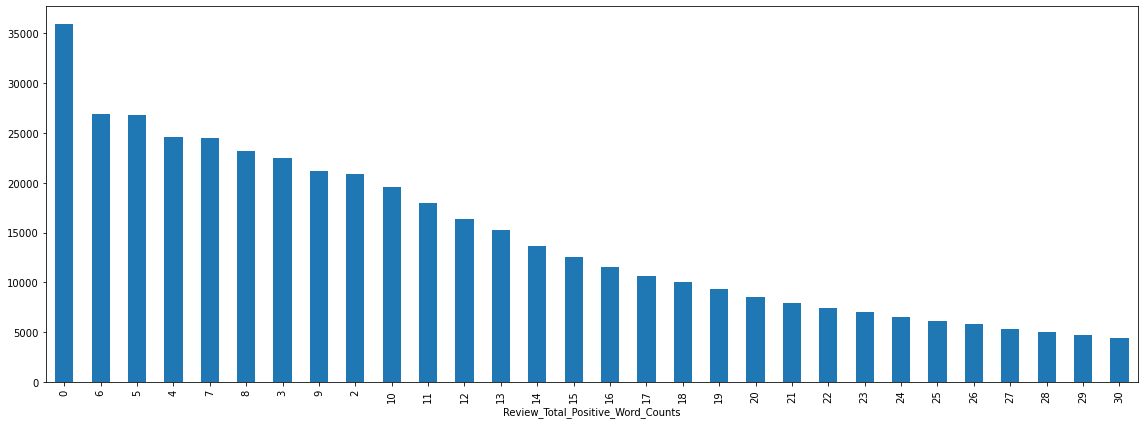

In [42]:
plt.figure(figsize=(16,6))
df_clean['Review_Total_Positive_Word_Counts'].value_counts().head(30).plot(kind = 'bar')
plt.tight_layout()

In [43]:
df_clean['Positive_Review'].value_counts()

Positive_Review
No Positive                                                                                                                                                                                                                                                                                                                                                                                                                           35901
 Location                                                                                                                                                                                                                                                                                                                                                                                                                              9207
 Everything                                                                                                                     

<AxesSubplot:xlabel='Positive_Review'>

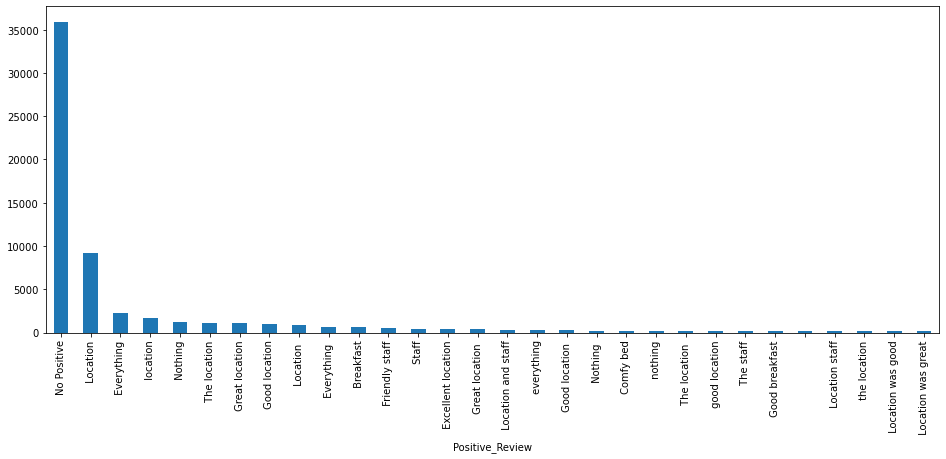

In [44]:
plt.figure(figsize=(16,6))
df_clean['Positive_Review'].value_counts().head(30).plot(kind = 'bar')

The analysis of the Positive_Review column reveals that a significant number of reviews (35,946) explicitly state 'No Positive' comment. Among those with positive comments, the most frequently mentioned aspect is 'Location', highlighted in various forms (e.g., 'Great location', 'Good location') in over 12,000 reviews. Other common positive remarks include 'Everything' (indicating overall satisfaction), specific mentions of 'Breakfast', 'Friendly staff', and 'Comfy bed'. The repetition of certain key terms like 'location', 'staff', and 'breakfast' underscores their importance in guest satisfaction.

<AxesSubplot:xlabel='Positive_Review'>

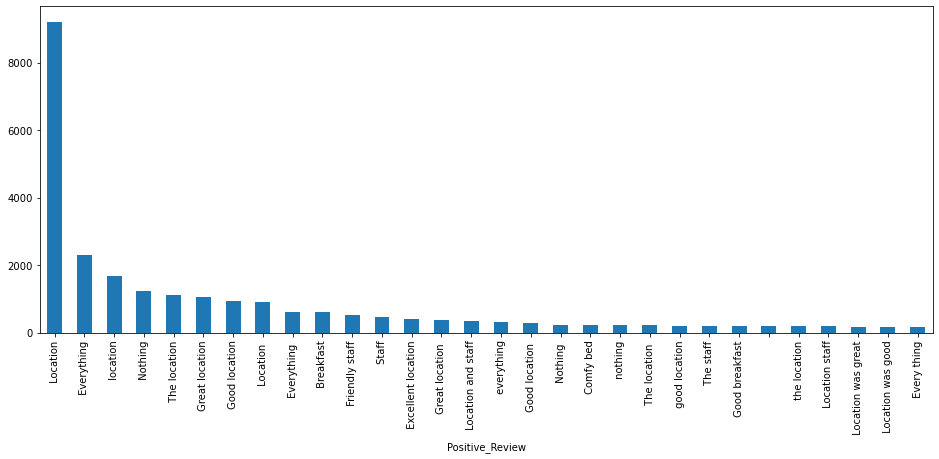

In [45]:
#remove 'No Positive' frome plot, it can be outlier
plt.figure(figsize=(16,6))
df_clean[df_clean['Positive_Review'] != 'No Positive']['Positive_Review'].value_counts().head(30).plot(kind = 'bar')

In [46]:
df_clean['Total_Number_of_Reviews'].value_counts()

Total_Number_of_Reviews
9086     4789
9568     4256
12158    4169
7105     3577
7491     3212
         ... 
66         12
43         12
45         12
207        12
110        10
Name: count, Length: 1142, dtype: int64

<AxesSubplot:xlabel='Total_Number_of_Reviews'>

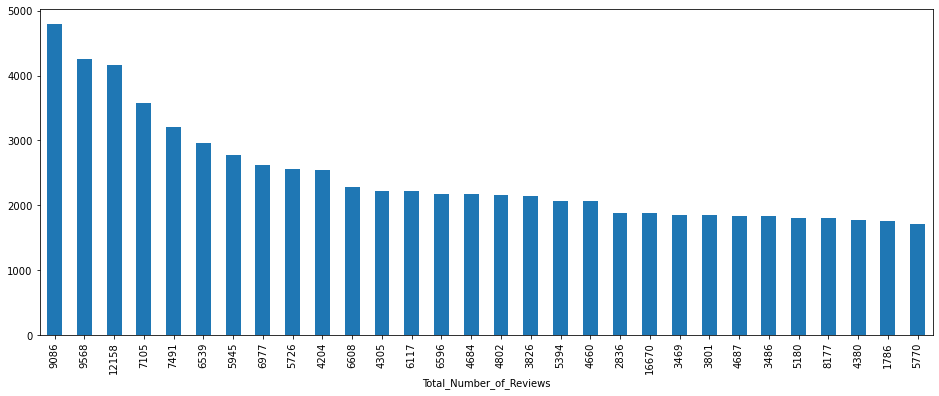

In [47]:
plt.figure(figsize=(16,6))
df_clean['Total_Number_of_Reviews'].value_counts().head(30).plot(kind = 'bar')

In [48]:
df_clean['Negative_Review'].value_counts().head(60)

Negative_Review
No Negative                    127755
 Nothing                        14286
 Nothing                         4233
 nothing                         2220
 N A                             1036
 None                             984
                                  849
 N a                              509
 Breakfast                        407
 Small room                       372
 Location                         367
 Everything                       325
 All good                         318
 Nothing really                   315
 none                             301
 nothing                          283
 No complaints                    274
 Price                            260
 Nothing really                   254
 Nil                              247
 n a                              227
 Nothing at all                   221
 Nothing to dislike               209
 Nothing at all                   194
 Small rooms                      188
 None                             

<AxesSubplot:xlabel='Negative_Review'>

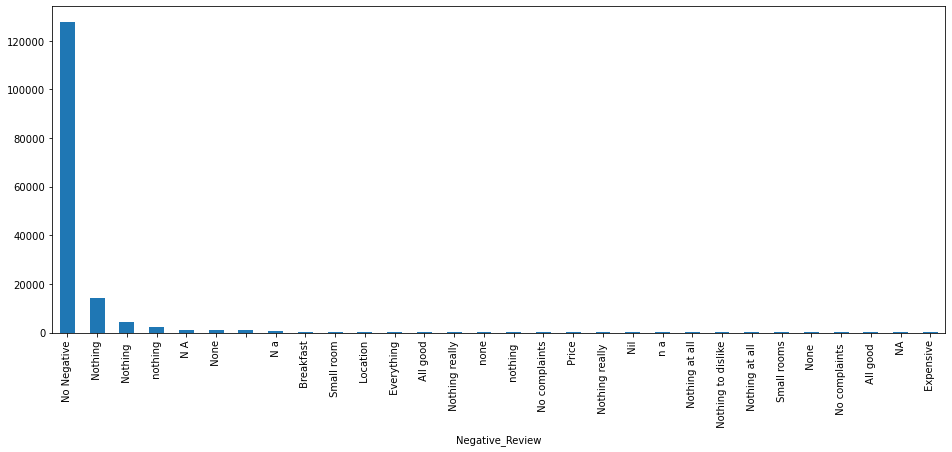

In [49]:
plt.figure(figsize=(16,6))
df_clean['Negative_Review'].value_counts().head(30).plot(kind = 'bar')

In the pre-processed dataset, the 'Negative_Review' column, labeled directly from guest comments, shows that a significant number of entries (127,890) are marked as 'No Negative', indicating an absence of negative feedback. Among the reviews with negative labels, common mentions include 'Nothing', 'Small room', 'Location', and 'Breakfast'. The high frequency of 'No Negative' or non-specific negative comments like 'Nothing' suggests that a large portion of guests did not express significant dissatisfaction. Analyzing the correlation between these negative labels and the 'Reviewer_Score' will provide insights into how much these negative aspects, or the lack thereof, influence the overall guest satisfaction and scoring behavior

In [50]:
df_clean['Average_Score'].value_counts()


Average_Score
8.4    41220
8.1    38119
8.5    38066
8.7    37798
8.6    36943
8.2    34847
8.3    32877
8.8    30835
8.9    28470
8.0    22341
9.1    21378
9.0    20960
7.8    19892
7.9    14848
7.5    13719
9.2    12935
9.3    12659
7.7    11829
9.4     9339
7.1     6780
7.6     6684
7.4     6298
7.3     3996
7.0     3899
6.9     1736
6.8     1304
9.5     1207
6.4     1163
6.7      965
9.6      915
7.2      684
6.6      400
5.2       65
9.8       28
Name: count, dtype: int64

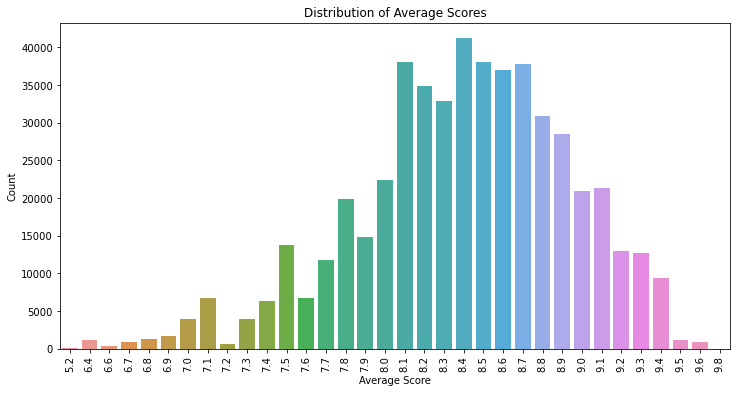

In [51]:
plt.figure(figsize=(12, 6))  # Set the size of the plot
sns.countplot(x='Average_Score', data=df_clean)

plt.xlabel('Average Score')  # Set the x-axis label
plt.ylabel('Count')          # Set the y-axis label
plt.title('Distribution of Average Scores')  # Set the title of the plot

plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability if needed

plt.show()

The Average_Score data shows a concentration of scores around the 8.0 to 8.9 range, indicating a generally high level of guest satisfaction. The most frequent score is 8.4 (41,222 instances), followed closely by 8.1 and 8.5. Scores above 9.0 are less common but still significant, with 9.1 and 9.0 also appearing frequently. The lower end of the scale (below 7.0) has notably fewer instances, suggesting that very low scores are relatively rare. This distribution highlights an overall positive guest experience in the dataset

In [52]:

df_clean['Additional_Number_of_Scoring'].value_counts()

Additional_Number_of_Scoring
2682    4789
2288    4256
2623    4169
1831    3577
1936    3212
        ... 
7         56
5         39
17        24
1         13
4         12
Name: count, Length: 480, dtype: int64

<AxesSubplot:xlabel='Additional_Number_of_Scoring'>

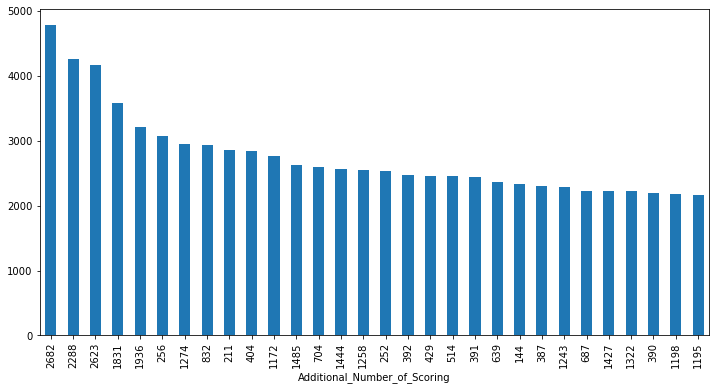

In [53]:
plt.figure(figsize=(12, 6))  # Set the size of the plot
df_clean['Additional_Number_of_Scoring'].value_counts().head(30).plot(kind = 'bar')

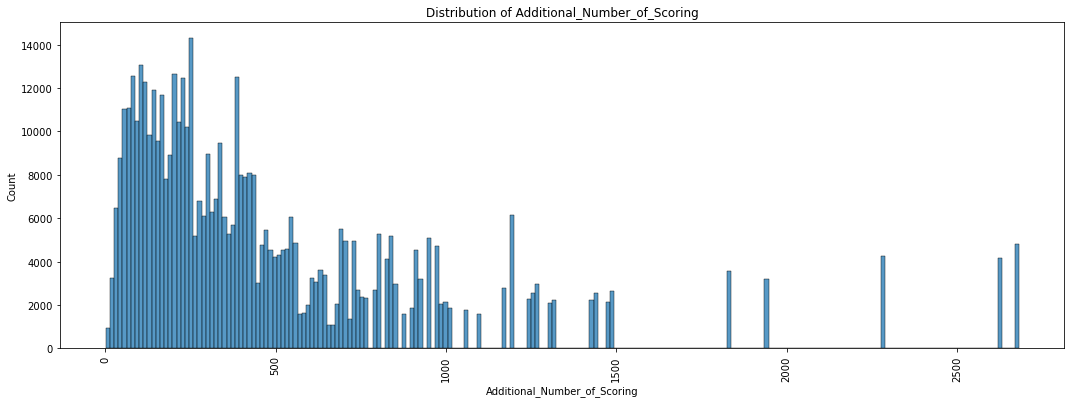

In [54]:
plt.figure(figsize=(18, 6))  # Set the size of the plot
sns.histplot(x='Additional_Number_of_Scoring', data=df_clean)

plt.xlabel('Additional_Number_of_Scoring')  # Set the x-axis label
plt.ylabel('Count')          # Set the y-axis label
plt.title('Distribution of Additional_Number_of_Scoring')  # Set the title of the plot

plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability if needed

plt.show()

In [55]:
#drop some of unuseful columns for speeding up the algoritms
df_clean.drop(columns=['Days_Since_Review', 'Latitude', 'Longitude', 'Day', 'Month', 'Year',
                      'Review_Total_Positive_Word_Counts','Total_Number_of_Reviews'],inplace=True)

In [56]:
df_clean.columns

Index(['Additional_Number_of_Scoring', 'Average_Score', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Positive_Review',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'Leisure_Trip', 'Nights_Stayed', 'Reviewer_Nationality',
       'Hotel_Address'],
      dtype='object')

## Preprocessing
Next, the text data needs to be processed for modelling.

2. Split the data into train and test sets and transform the positive and negative review columns using a CountVectorizer. Consider the following:

What tokenizer and text cleaning steps do you include?


Using the vectorizer, maximize the number of features at 500 and make sure that tokens used <10 times are dropped from the vocabulary.

This process may be done on the positive and negative review columns separately and then the resulting arrays merged with the original numeric features to form the final train and test data frames ready for modelling. In your column names, make sure you mark which words are coming from the positive vs negative reviews 

In [57]:
df_clean.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Positive_Review,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Leisure_Trip,Nights_Stayed,Reviewer_Nationality,Hotel_Address
0,194,7.7,I am so angry that i made this post available...,397,Only the park outside of the hotel was beauti...,7,0,1,6,Other,Amsterdam
1,194,7.7,No Negative,0,No real complaints the hotel was great great ...,7,0,1,4,Ireland,Amsterdam
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,Location was good and staff were ok It is cut...,9,0,1,3,Australia,Amsterdam
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,Great location in nice surroundings the bar a...,1,0,1,3,UK,Amsterdam
4,194,7.7,You When I booked with your company on line y...,140,Amazing location and building Romantic setting,3,0,1,2,Other,Amsterdam


#### NEGATIVE REVIEWS

most of place holder and list will get _neg for easier identify from positive reviews

In [58]:
df_neg = df_raw.copy()

In [59]:
df_neg.shape

(515199, 29)

In [60]:
# create X and y
X = df_neg["Negative_Review"]
y = df_neg['Reviewer_Score']

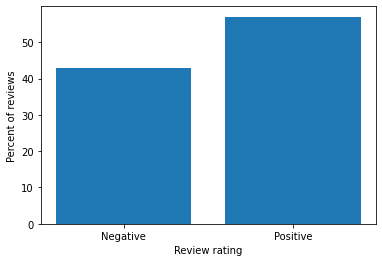

In [61]:
# plot the ratio of reviews
value_counts = dict(df_neg['Reviewer_Score'].value_counts(normalize=True)*100)
plt.figure()
plt.bar(value_counts.keys(), value_counts.values())
plt.xlabel('Review rating')
plt.ylabel('Percent of reviews')
plt.xticks([0, 1],['Negative', 'Positive'])
plt.show()

#### split data in a way without shuffling to keep the order

In [62]:
# split without randomize and stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, stratify=None)

Now our task is to convert each review into into numeric representation using vectorization

In [63]:
# Initialise a CountVectorizer object
count_vectorizer_neg = CountVectorizer(max_features=500,min_df=10)

# Fit the CountVectorizer object on X_train
count_vectorizer_neg.fit(X_train)

# Transform X_train and X_test using the fitted CountVectorizer object
count_matrix_train_neg = count_vectorizer_neg.transform(X_train)
count_matrix_test_neg = count_vectorizer_neg.transform(X_test)

print('The output type is',type(count_matrix_train_neg))

# Preview the shape of the transformed matrices
print(count_matrix_train_neg.shape)
print(count_matrix_test_neg.shape)

The output type is <class 'scipy.sparse.csr.csr_matrix'>
(412159, 500)
(103040, 500)


first look at the top token words

In [64]:
print(list(count_vectorizer_neg.vocabulary_.keys())[:30])

['am', 'so', 'that', 'made', 'this', 'available', 'all', 'use', 'when', 'my', 'no', 'one', 'will', 'make', 'the', 'of', 'booking', 'place', 'com', 'we', 'stayed', 'for', 'nights', 'in', 'hotel', 'from', 'to', 'arrival', 'were', 'small']


In [65]:
# sum all the rows for each feature
word_counts = pd.DataFrame(
        {"counts": np.array(count_matrix_train_neg.sum(axis=0)).flatten()},
        index=count_vectorizer_neg.get_feature_names_out()).sort_values("counts", ascending=False)

print('The most common words and their counts are:')
word_counts[:20]

The most common words and their counts are:


,counts
the,422313
was,191754
to,182702
and,176017
no,157674
room,144013
in,133779
negative,102846
not,99069
of,96168


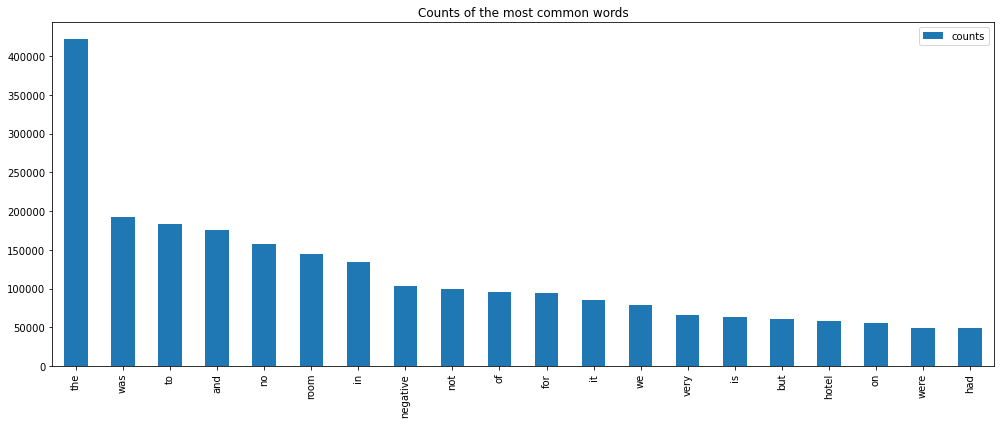

In [66]:
# plot top common word for negative
word_counts[:20].plot(kind='bar',title='Counts of the most common words',figsize=(14,6))
plt.tight_layout()

as we can see there is a lots ot stop word and other LNP common word, lets get ride of them using costumize tokenizer. in this function try to use all known method to make the tokenizer efficient. such as WordNetLemmatizer and PorterStemmer, also number and double white sapce will remove.

In [67]:
import string
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

# Assuming stop_words is a predefined list of stopwords
stop_words = set(stopwords.words('english'))

def my_tokenizer(document, lemmatization=False, stemming=True):
    '''
    Function for use in Vectorizer that tokenizes the document.
    '''
    # Convert to lowercase
    document = document.lower()

    # Remove punctuation
    document = re.sub(f'[{string.punctuation}]', '', document)

    # Remove numbers
    document = re.sub(r'\d+', '', document)

    # Tokenize - split on whitespace
    tokenized_document = document.split()

    # Remove stopwords
    tokenized_document = [word for word in tokenized_document if word not in stop_words]

    # Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    if stemming and not lemmatization:
        tokenized_document = [stemmer.stem(word) for word in tokenized_document]
    elif lemmatization:
        tokenized_document = [lemmatizer.lemmatize(word) for word in tokenized_document]

    return tokenized_document


In [68]:
# Initialise a CountVectorizer object with given parameters and ngram of 1 and 2
count_vectorizer_neg = CountVectorizer(tokenizer=my_tokenizer, max_features=500,min_df=10,ngram_range=(1,2))

# Fit the CountVectorizer object on X_train
count_vectorizer_neg.fit(X_train)

# Fit the CountVectorizer object on X_train
X_matrix_train_neg = count_vectorizer_neg.transform(X_train)

print(X_matrix_train_neg.shape)

C:\Users\azarb\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(412159, 500)


In [69]:
# sum all the rows for each feature create the dataframe of common words
word_counts = pd.DataFrame(
        {"counts": np.array(count_matrix_train_neg.sum(axis=0)).flatten()},
        index=count_vectorizer_neg.get_feature_names_out()).sort_values("counts", ascending=False)

print('The most common words and their counts are:')
word_counts[:20]

The most common words and their counts are:


,counts
standard,422313
upgrad,191754
tea coffe,182702
around,176017
one,157674
room could,144013
kept,133779
non,102846
option,99069
outsid,96168


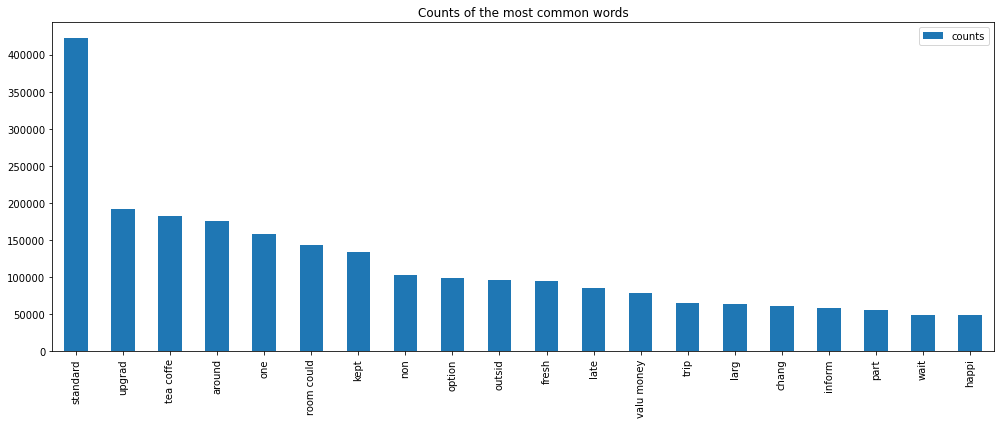

In [70]:
# plot common word for negative reviews
word_counts[:20].plot(kind='bar',title='Counts of the most common words',figsize=(14,6))
plt.tight_layout()

In [71]:
pd.DataFrame(X_matrix_train_neg.toarray(),columns=count_vectorizer_neg.get_feature_names_out()).head()

,abl,absolut,ac,access,actual,addit,advertis,air,air con,air condit,...,window,without,work,worst,worth,would,would like,would nice,wrong,year
0,1,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
#check shape of dataframe for train set
pd.DataFrame(X_matrix_train_neg.toarray(),columns=count_vectorizer_neg.get_feature_names_out()).shape

(412159, 500)

In [73]:
# transform test set as requierd and check shape of dataframe for test set
X_matrix_test_neg = count_vectorizer_neg.transform(X_test)
X_matrix_test_neg.shape

(103040, 500)

In [74]:
pd.DataFrame(X_matrix_test_neg.toarray(),columns=count_vectorizer_neg.get_feature_names_out()).head()

,abl,absolut,ac,access,actual,addit,advertis,air,air con,air condit,...,window,without,work,worst,worth,would,would like,would nice,wrong,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### POSITIVE REVIEWS

In [75]:
df_pos = df_raw.copy()

In [76]:
X = df_pos["Positive_Review"]
y = df_pos['Reviewer_Score']

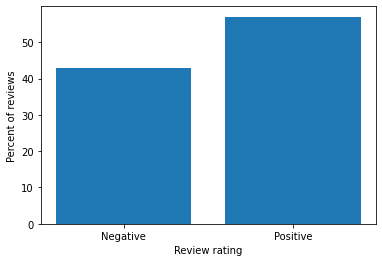

In [77]:
value_counts = dict(df_pos['Reviewer_Score'].value_counts(normalize=True)*100)
plt.figure()
plt.bar(value_counts.keys(), value_counts.values())
plt.xlabel('Review rating')
plt.ylabel('Percent of reviews')
plt.xticks([0, 1],['Negative', 'Positive'])
plt.show()

#### split data in a way without shuffling to keep the order

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, stratify=None)

In [79]:
# Initialize a CountVectorizer object with the custom tokenizer
count_vectorizer = CountVectorizer(tokenizer=my_tokenizer,max_features=500,min_df=10)

# Fit the CountVectorizer object to the training data
count_vectorizer.fit(X_train)

# Transform the training data to a count matrix
count_matrix_train = count_vectorizer.transform(X_train)

# Print the shape of the count matrix
print(count_matrix_train.shape)

C:\Users\azarb\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(412159, 500)


In [80]:
# Initialise a CountVectorizer object with given parameter and ngram of 1 and 2
count_vectorizer = CountVectorizer(tokenizer=my_tokenizer, max_features=500,min_df=10,ngram_range=(1,2))

# Fit the CountVectorizer object on X_train
count_vectorizer.fit(X_train)

# Fit the CountVectorizer object on X_train
X_matrix_train = count_vectorizer.transform(X_train)

print(X_matrix_train.shape)

(412159, 500)


In [81]:
# sum all the rows for each feature to get most common world of positive reviews
word_counts = pd.DataFrame(
        {"counts": np.array(count_matrix_train.sum(axis=0)).flatten()},
        index=count_vectorizer.get_feature_names_out()).sort_values("counts", ascending=False)

print('The most common words and their counts are:')
word_counts[:20]

The most common words and their counts are:


,counts
locat comfort,161552
squar,158047
roof,144179
help staff,101238
good staff,87466
great,84055
front desk,70399
guest,68118
buffet,64088
modern,56053


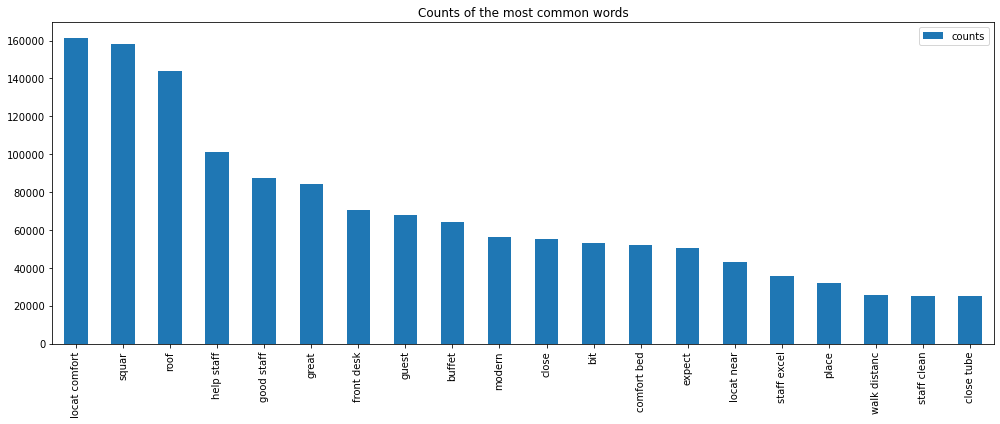

In [82]:
# plot the top common words for positive reviews
word_counts[:20].plot(kind='bar',title='Counts of the most common words',figsize=(14,6))
plt.tight_layout()

In [83]:
pd.DataFrame(X_matrix_train.toarray(),columns=count_vectorizer.get_feature_names_out()).shape

(412159, 500)

In [84]:
pd.DataFrame(X_matrix_train.toarray(),columns=count_vectorizer.get_feature_names_out()).head()

,abl,absolut,access,accommod,across,air,airport,also,although,alway,...,within,within walk,without,wonder,work,worth,would,would definit,would stay,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# transform test set as requierd and check shape of dataframe for test set
X_matrix_test_pos = count_vectorizer.transform(X_test)
X_matrix_test_pos.shape

(103040, 500)

since data only split by index rejoin them will not change the index sequence

keep track of diffrent matris and varablre for positive and negative cells will help with joining the results

In [86]:
# Combine transformed features with original numeric features for train set
X_train_final = pd.concat([
    pd.DataFrame(X_matrix_train.toarray(), columns=['pos_' + f for f in count_vectorizer.get_feature_names_out()]),
    pd.DataFrame(X_matrix_train_neg.toarray(), columns=['neg_' + f for f in count_vectorizer_neg.get_feature_names_out()])
], axis=1)
# Combine transformed features with original numeric features for test set
X_test_final = pd.concat([
    pd.DataFrame(X_matrix_test_pos.toarray(), columns=['pos_' + f for f in count_vectorizer.get_feature_names_out()]),
    pd.DataFrame(X_matrix_test_neg.toarray(), columns=['neg_' + f for f in count_vectorizer_neg.get_feature_names_out()])
], axis=1)


its NOT clear why we should split data if we not using the target for predicting and we join the data again

In [87]:
X_train_final.isna().sum().sum()

0

In [88]:
X_train_final.shape

(412159, 1000)

In [89]:
X_test_final.shape

(103040, 1000)

In [90]:
token_data =  pd.concat([X_train_final,X_test_final], axis=0).reset_index(drop=True)

In [91]:
token_data.shape

(515199, 1000)

In [92]:
df_raw.shape

(515199, 29)

we consider rejoin token_data with raw_data after some cleaning and prepration for ML model. since the shape of 2 data sets are the same and order is untouch,it will give us the same order. even split again will keep the test seperate, and we avoid from dataleakage.

In [93]:
df_join = df_raw.copy().reset_index(drop=True)

In [94]:
df_join.head(5)

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,...,0,1,1,0,0,0,0,0,1,6
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,...,0,0,1,0,0,0,0,0,1,4
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,...,0,0,1,0,0,0,0,0,1,3
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,...,0,0,1,0,0,0,0,0,1,3
4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,...,0,1,1,0,0,0,0,0,1,2


In [95]:
#drop some of unuseful columns along with positive and negative reviews
df_join.drop(columns=['Positive_Review','Negative_Review','Days_Since_Review', 'Latitude', 'Longitude', 'Day', 'Month', 'Year',
                      'Review_Total_Positive_Word_Counts','Total_Number_of_Reviews','Review_Total_Negative_Word_Counts','Additional_Number_of_Scoring'],inplace=True)

In [96]:
# drop refrence category of dummy variables
df_join.drop(columns=['Hotel_Address_Vienna','Reviewer_Nationality_Australia'],inplace=True)

In [97]:
df_join.shape

(515199, 15)

time to join data sets and creat a data sets for ML models

In [155]:

df_train = pd.concat([df_join, token_data], axis=1)


In [156]:
df_train.shape

(515199, 1015)

In [157]:
df_train.head()

,Average_Score,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,...,neg_window,neg_without,neg_work,neg_worst,neg_worth,neg_would,neg_would like,neg_would nice,neg_wrong,neg_year
0,7.7,7,0,0,0,0,0,1,1,0,...,3,0,0,0,0,1,0,0,0,0
1,7.7,7,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,7.7,9,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,7.7,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,7.7,3,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


now split data in a way without shuffling to keep the order for X and y, which keep y without get info from X

In [158]:
X = df_train.drop('Reviewer_Score',axis=1)
y = df_train['Reviewer_Score']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, stratify=None)

In [103]:
# Initialize and fit the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [104]:
from sklearn.metrics import accuracy_score

# Predictions
train_preds = log_reg.predict(X_train)
test_preds = log_reg.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.7967459160178475
Test Accuracy: 0.7907608695652174


### top 20 for positive reviews

In [105]:
#  CountVectorizer instance
feature_names = count_vectorizer.get_feature_names_out()

# Get the coefficients from the logistic regression model
coefficients = log_reg.coef_[0]

# Combine feature names and coefficients
features_coefficients = zip(feature_names, coefficients)

# Sort by coefficient value and get top 20 for positive
top_positive = sorted(features_coefficients, key=lambda x: x[1], reverse=True)[:20]

print("Top 20 words for positive sentiment:", top_positive)

Top 20 words for positive sentiment: [('walk', 1.7745447981776294), ('fabul', 1.3504393321161796), ('plenti', 1.0323036811062665), ('abl', 0.9543320499071429), ('food', 0.8664257430271541), ('awesom', 0.8658027359163853), ('charm', 0.8363907286378811), ('tidi', 0.8147414073000803), ('fresh', 0.8108576261235756), ('profession', 0.8073836284760311), ('floor', 0.7812569367526404), ('modern', 0.775075385996315), ('fab', 0.7633380827001416), ('famili', 0.7192064100305201), ('bedroom', 0.6887035310538666), ('bottl', 0.658815741645705), ('friendli help', 0.6455316498076206), ('locat', 0.6264314335464289), ('went', 0.6130953710224855), ('hyde park', 0.6012967045473194)]


In [106]:
# top_positive lists of words and coefficients
df_positive = pd.DataFrame(top_positive, columns=['Word', 'Coefficient'])

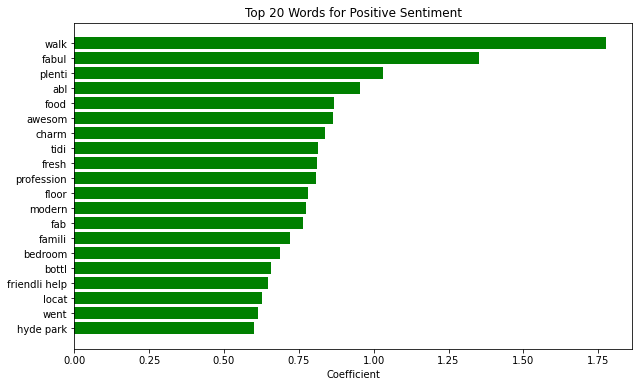

In [107]:
# Plot for positive sentiment words
plt.figure(figsize=(10, 6))
plt.barh(df_positive['Word'], df_positive['Coefficient'], color='green')
plt.xlabel('Coefficient')
plt.title('Top 20 Words for Positive Sentiment')
plt.gca().invert_yaxis()  # To display the highest values at the top
plt.show()



### Key Insights from Top Positive Sentiment Words

1. **Location is Crucial**: Words like 'walk' and 'locat' indicate that guests highly value proximity to attractions.

2. **Quality of Facilities and Service**: Terms such as 'modern', 'tidi', and 'profession' highlight the importance of high-quality facilities and professional service.

3. **Food and Amenities**: The significance of dining options and amenities is underscored by words like 'food' and 'bottl'.

4. **Atmosphere and Comfort**: A pleasant atmosphere and comfort are valued, as suggested by 'fabul', 'awesom', and 'charm'.

5. **Excellent Customer Service**: The term 'friendli help' emphasizes the priority placed on friendly and helpful customer service.


### top 20 for negative reviews

In [108]:
#  CountVectorizer instance
feature_names = count_vectorizer_neg.get_feature_names_out()

# Get the coefficients from the logistic regression model
coefficients = log_reg.coef_[0]

# Combine feature names and coefficients
features_coefficients = zip(feature_names, coefficients)

# Sort by coefficient value and get top 20 for negative
top_negative = sorted(features_coefficients, key=lambda x: x[1])[:20]

print("Top 20 words for negative sentiment:", top_negative)

Top 20 words for negative sentiment: [('person', -1.066847971971402), ('pictur', -1.0012653941451297), ('face', -0.7531724252531703), ('side', -0.5706273472633443), ('done', -0.4496952826402799), ('view', -0.4366905021705401), ('full', -0.41256964142138), ('cold', -0.4065496984073498), ('call', -0.40556391614938203), ('sign', -0.38047291690485596), ('ok', -0.3793452945802618), ('feel', -0.36622053119802617), ('access', -0.3547674001666041), ('small', -0.31890022567720167), ('sound', -0.3028189555248939), ('pillow', -0.2784675177631736), ('reason', -0.27071251775156935), ('coffe', -0.2706940716866133), ('mention', -0.26391491597491123), ('tea coffe', -0.2600349641687515)]


In [109]:
# top_negative lists of words and coefficients
df_negative = pd.DataFrame(top_negative, columns=['Word', 'Coefficient'])

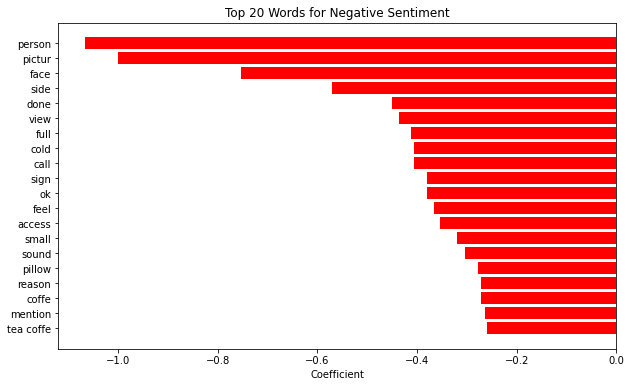

In [110]:
# Plot for negative sentiment words
plt.figure(figsize=(10, 6))
plt.barh(df_negative['Word'], df_negative['Coefficient'], color='red')
plt.xlabel('Coefficient')
plt.title('Top 20 Words for Negative Sentiment')
plt.gca().invert_yaxis()  # To display the highest values at the top
plt.show()


### Key Insights from Top Negative Sentiment Words

1. **Personal Experience**: Words like 'person' and 'feel' suggest that individual dissatisfaction is a significant factor in negative reviews.

2. **Room Quality and Views**: Terms such as 'pictur', 'view', and 'small' indicate issues with the quality of rooms and unmet expectations regarding views.

3. **Amenities and Comfort**: References to 'cold', 'pillow', and 'tea coffe' highlight discomfort with room amenities and temperature.

4. **Service and Responsiveness**: 'call' and 'done' imply dissatisfaction with the responsiveness of services and problem resolution.

5. **Facility Accessibility**: The mention of 'access' points to concerns about the accessibility of facilities.


Lets do some metrics for LogisticRegression

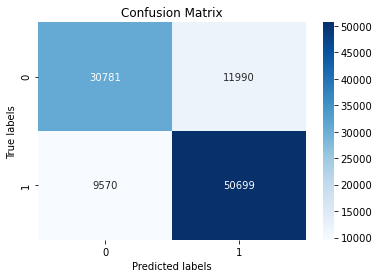

In [160]:
from sklearn.metrics import confusion_matrix

#create prediction
y_pred = log_reg.predict(X_test)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [162]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)  # Precision: Correct positive predictions relative to total predicted positives
recall = recall_score(y_test, y_pred)       # Recall: Correct positive predictions relative to actual positives
f1 = f1_score(y_test, y_pred)               # F1 Score: Harmonic mean of precision and recall

# Print the scores
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.8087383751535357
Recall: 0.8412118999817485
F1 Score: 0.8246555734478439


#### Insights about LogisticRegression

High Precision (0.81): Model has a high precision score, indicating that it is quite accurate when it predicts a positive class. In other words, when it predicts a positive sentiment, it is correct about 81% of the time.

Good Recall (0.84): The recall score is also high, suggesting that the model is effective at identifying most of the actual positive cases. It correctly identifies approximately 84% of all positive sentiments. This is important if it's crucial to capture as many positive cases as possible.

Balanced F1 Score (0.82): The F1 score, which balances precision and recall, is around 0.82. This indicates a good balance between precision and recall, making the model reliable for scenarios where both false positives and false negatives are of concern.

##### Additional Considerations:

Feature Importance: Investigate which features are most influential in predicting positive sentiment. This can provide insights into what factors most strongly correlate with positive reviews.

Error Analysis: Conduct a detailed error analysis to understand the cases where the model fails, which can guide further improvements.



#### 4. Using a pipeline, combine PCA with a decision tree classifier.

Optimize at least 3 hyperparameters including the maximum tree depth and the minimum number of data points required on each leaf node.
You can use 20 principle components.
The best parameters should be found using 5-fold cross validation.

In [113]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

first tried to do some pipe line but the memory is too full to handle the data. lets run decision tree with default parameters

In [114]:
# Initialize the Decision Tree Classifier with default parameters
decision_tree = DecisionTreeClassifier()


In [115]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the average score
average_cv_score = cv_scores.mean()
print("Average cross-validation score:", average_cv_score)


Cross-validation scores: [0.7025791  0.69906104 0.70056531 0.67961471 0.68673193]
Average cross-validation score: 0.6937104200600092


time for run the cross-validation was around 10 minutes, with default parameter of DecisionTreeClassifier. which indicate time consuming and Not efficency of this model. also lower Cross-validation score compare to Logestic regression show that without hyperparameter tuning logestic regression do a better prediction.

here is definition of pipeline and gridsearch without run them

In [ ]:
# Define the hyperparameters to optimize
parameters = {
    'clf__max_depth': [i for i in range(1,25)],
    'clf__min_samples_leaf': [1, 2, 4, 6, 8],
    'clf__criterion': ['gini', 'entropy']  
}


In [ ]:
# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)


In [ ]:
# Print the best parameters
print("Best parameters found:")
print(grid_search.best_params_)


In [ ]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test score of the best model: {test_score}")


for this pipe line the memory get error. try to change the data type of columns

In [117]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515199 entries, 0 to 515198
Columns: 1015 entries, Average_Score to neg_year
dtypes: float64(1), int64(1014)
memory usage: 3.9 GB


since all of other columns of df_train coming from df_join, we can drop those columns and using spares method for run the pipelines

In [118]:
df_join.columns

Index(['Average_Score', 'Total_Number_of_Reviews_Reviewer_Has_Given',
       'Reviewer_Score', 'Reviewer_Nationality_Ireland',
       'Reviewer_Nationality_UAE', 'Reviewer_Nationality_UK',
       'Reviewer_Nationality_USA', 'Reviewer_Nationality_Other',
       'Hotel_Address_Amsterdam', 'Hotel_Address_Barcelona',
       'Hotel_Address_London', 'Hotel_Address_Milan', 'Hotel_Address_Paris',
       'Leisure_Trip', 'Nights_Stayed'],
      dtype='object')

In [119]:
df_train.drop(['Average_Score', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Nationality_Ireland',
       'Reviewer_Nationality_UAE', 'Reviewer_Nationality_UK',
       'Reviewer_Nationality_USA', 'Reviewer_Nationality_Other',
       'Hotel_Address_Amsterdam', 'Hotel_Address_Barcelona',
       'Hotel_Address_London', 'Hotel_Address_Milan', 'Hotel_Address_Paris',
       'Leisure_Trip', 'Nights_Stayed'], inplace=True, axis=1)

In [120]:
df_train.shape

(515199, 1001)

create X and y again for transform X o X_sparse

In [122]:
X = df_train.drop('Reviewer_Score',axis=1)
y = df_train['Reviewer_Score']

In [123]:
# import csr_matrix and transform X
from scipy.sparse import csr_matrix
X_sparse = csr_matrix(X)


now split data in a way without shuffling to keep the order for X and y, which keep y without get info from X and rename X-train to X_sparse

In [130]:
X_sparse, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, shuffle=False, stratify=None)

In [131]:
# import TruncatedSVD which works with sparse datas
from sklearn.decomposition import TruncatedSVD


In [132]:
# Create a pipeline with TruncatedSVD and Decision Tree Classifier
pipeline = Pipeline([
    ('svd', TruncatedSVD(n_components=20)),
    ('clf', DecisionTreeClassifier())
])


In [137]:
# Define the hyperparameters to optimize
parameters = {
    'clf__max_depth': [i for i in range(1,3)],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__criterion': ['gini', 'entropy']  
}

In [138]:
# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_sparse, y_train)  


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('svd', TruncatedSVD(n_components=20)),
                                       ('clf', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [1, 2],
                         'clf__min_samples_leaf': [1, 2, 4]})

In [139]:
# Print the best parameters
print("Best parameters found:")
print(grid_search.best_params_)


Best parameters found:
{'clf__max_depth': 1, 'clf__min_samples_leaf': 1}


In [140]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test score of the best model: {test_score}")


Test score of the best model: 0.724805900621118


here we catch max depth of 1 and min leaf of 1 as well, which give us less accuracy than logesticregression.

lets try for two main method

In [141]:
# Define the hyperparameters to optimize
parameters = {
    'clf__max_depth': [i for i in range(1,3)],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__criterion': ['gini', 'entropy']  
}

In [142]:
# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_sparse, y_train)  


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('svd', TruncatedSVD(n_components=20)),
                                       ('clf', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [1, 2],
                         'clf__min_samples_leaf': [1, 2, 4]})

In [143]:
# Print the best parameters
print("Best parameters found:")
print(grid_search.best_params_)

Best parameters found:
{'clf__criterion': 'gini', 'clf__max_depth': 1, 'clf__min_samples_leaf': 1}


In [144]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test score of the best model: {test_score}")

Test score of the best model: 0.724805900621118


With try another method it show that still default will give a better result, but still less than LogesticReggression.

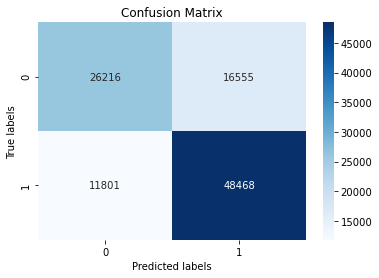

In [147]:
y_pred = best_model.predict(X_test)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [148]:
# Calculate precision, recall, and F1 score for DecisionTreeClassifier
precision_DTC = precision_score(y_test, y_pred)  # Precision: Correct positive predictions relative to total predicted positives
recall_DTC = recall_score(y_test, y_pred)       # Recall: Correct positive predictions relative to actual positives
f1_DTC = f1_score(y_test, y_pred)               # F1 Score: Harmonic mean of precision and recall

# Print the scores
print(f"Precision: {precision_DTC}")
print(f"Recall: {recall_DTC}")
print(f"F1 Score: {f1_DTC}")


Precision: 0.745397782323178
Recall: 0.8041945278667308
F1 Score: 0.7736806819270186


In [163]:
# Print the precision, recall, and F1 score for Logesticregression
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.8087383751535357
Recall: 0.8412118999817485
F1 Score: 0.8246555734478439


### Model Performance Comparison: Logistic Regression vs Decision Tree

- **Logistic Regression**:
  - Precision: 0.81
  - Recall: 0.84
  - F1 Score: 0.82
  - **Insights**: Exhibits a well-balanced performance, particularly effective in minimizing false positives.

- **Decision Tree (Post Hyperparameter Tuning)**:
  - Precision: 0.75
  - Recall: 0.80
  - F1 Score: 0.77
  - **Insights**: Shows robust performance with a strong focus on recall, slightly less precise than Logistic Regression.

### Conclusion
- **Logistic Regression** is more precise, making it suitable for scenarios where accuracy in predicting positive cases is crucial.
- **Decision Tree** offers competitive recall, beneficial when it's important not to miss positive cases.
- **Choice of Model** depends on the specific application needs, balancing precision and recall, and the importance of model interpretability.


In [ ]:
df_raw.head(1)

In [ ]:
df_clean.head(1)

In [ ]:
df_join.head(1)

In [ ]:
df_train.head(1)

In [ ]:
df_neg.head(1)